# Heart Disease EDA
Simple exploratory analysis — pie charts per feature over target, plus distributions.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
train = pd.read_csv('train.csv')
train.drop(columns=['id'], inplace=True, errors='ignore')
target = 'Heart Disease'
print(train.shape)
train.head()

(630000, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


## Target Distribution

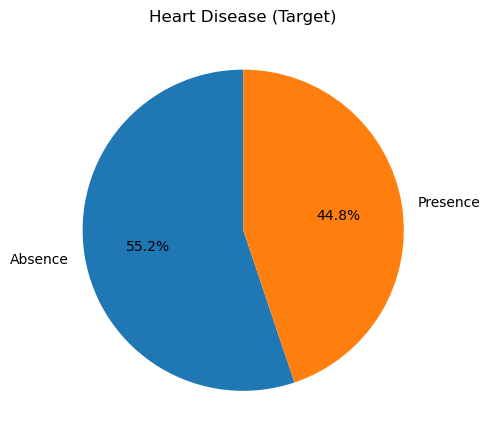

In [3]:
fig, ax = plt.subplots(figsize=(5, 5))
counts = train[target].value_counts()
ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Heart Disease (Target)')
plt.tight_layout()
plt.show()

## Pie Charts: Each Feature by Target

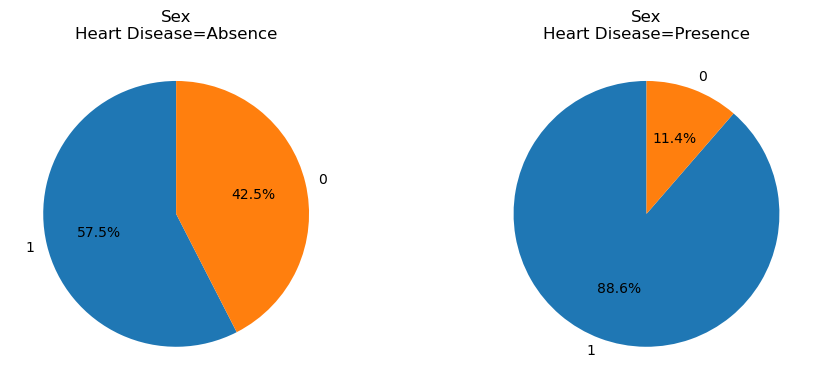

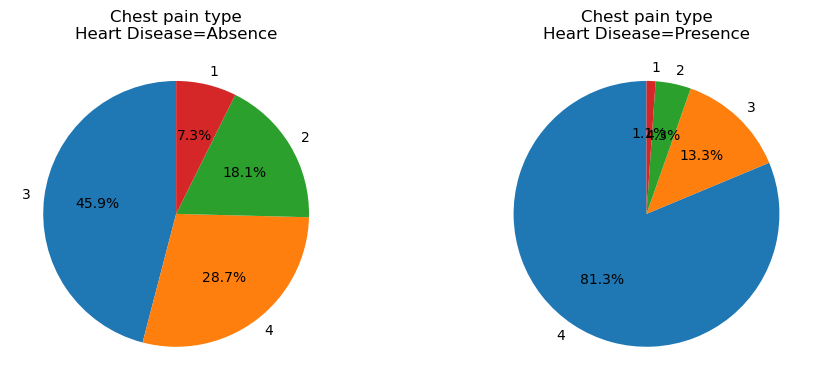

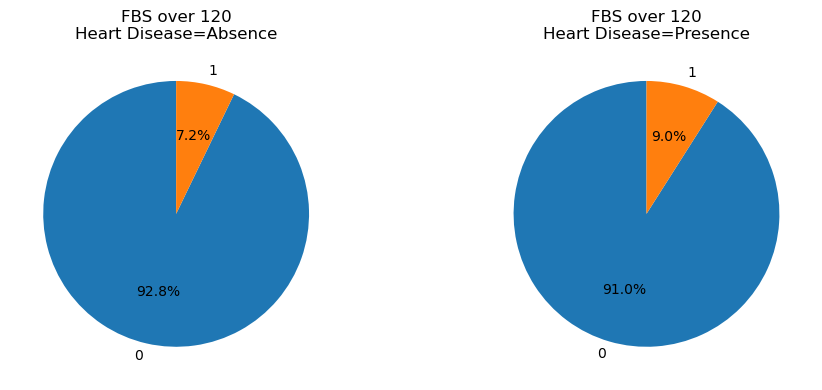

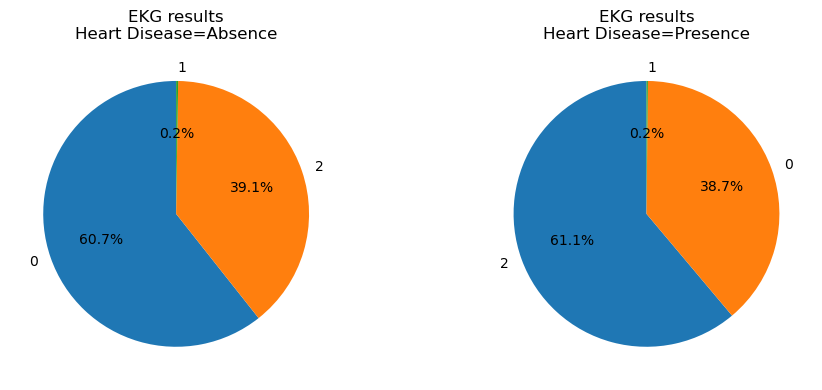

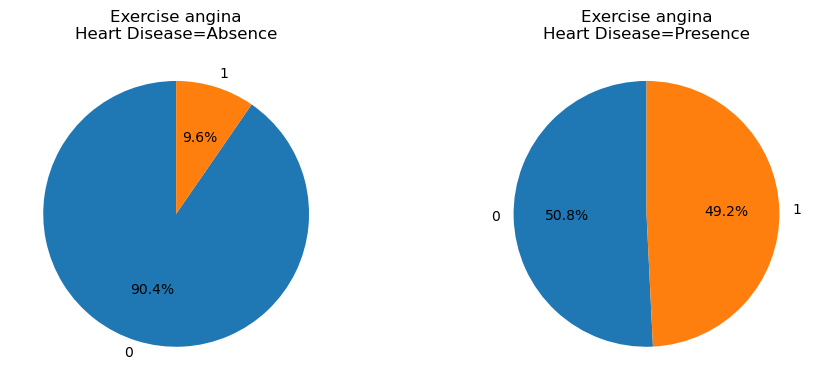

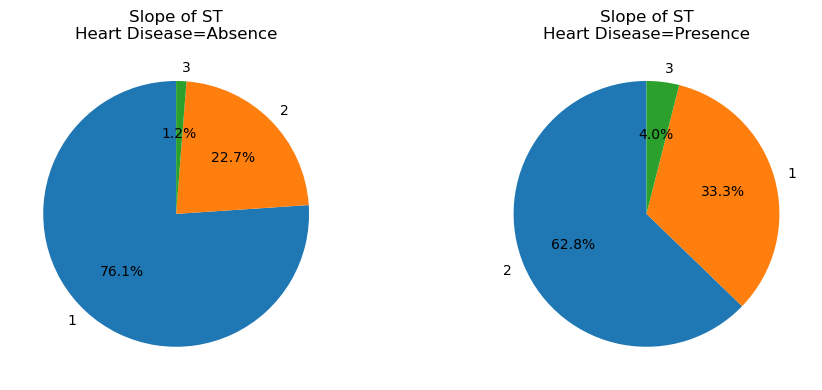

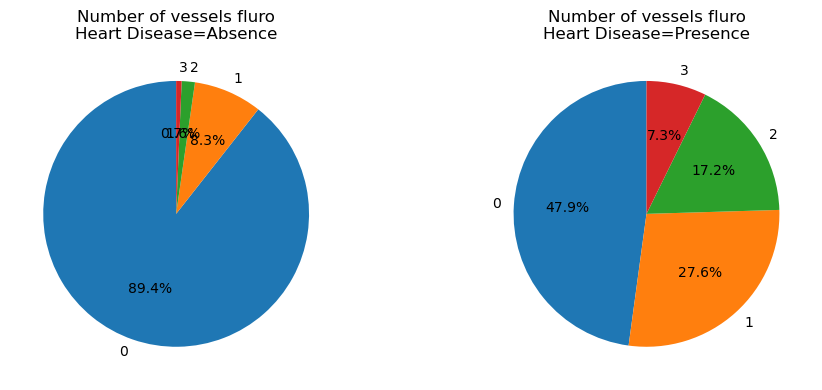

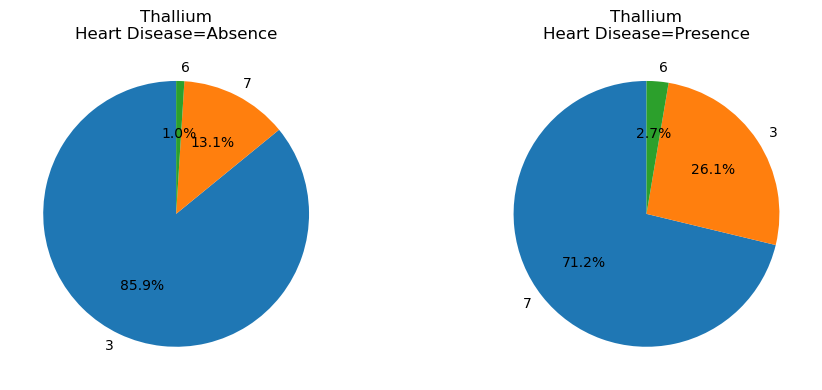

In [4]:
cat_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results',
                'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

target_vals = train[target].unique()

for feat in cat_features:
    if feat not in train.columns:
        continue
    fig, axes = plt.subplots(1, len(target_vals), figsize=(5 * len(target_vals), 4))
    if len(target_vals) == 1:
        axes = [axes]
    for ax, tval in zip(axes, sorted(target_vals)):
        subset = train[train[target] == tval][feat].value_counts()
        ax.pie(subset, labels=subset.index.astype(str), autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{feat}\n{target}={tval}')
    plt.tight_layout()
    plt.show()

## Distributions: Numeric Features over Target

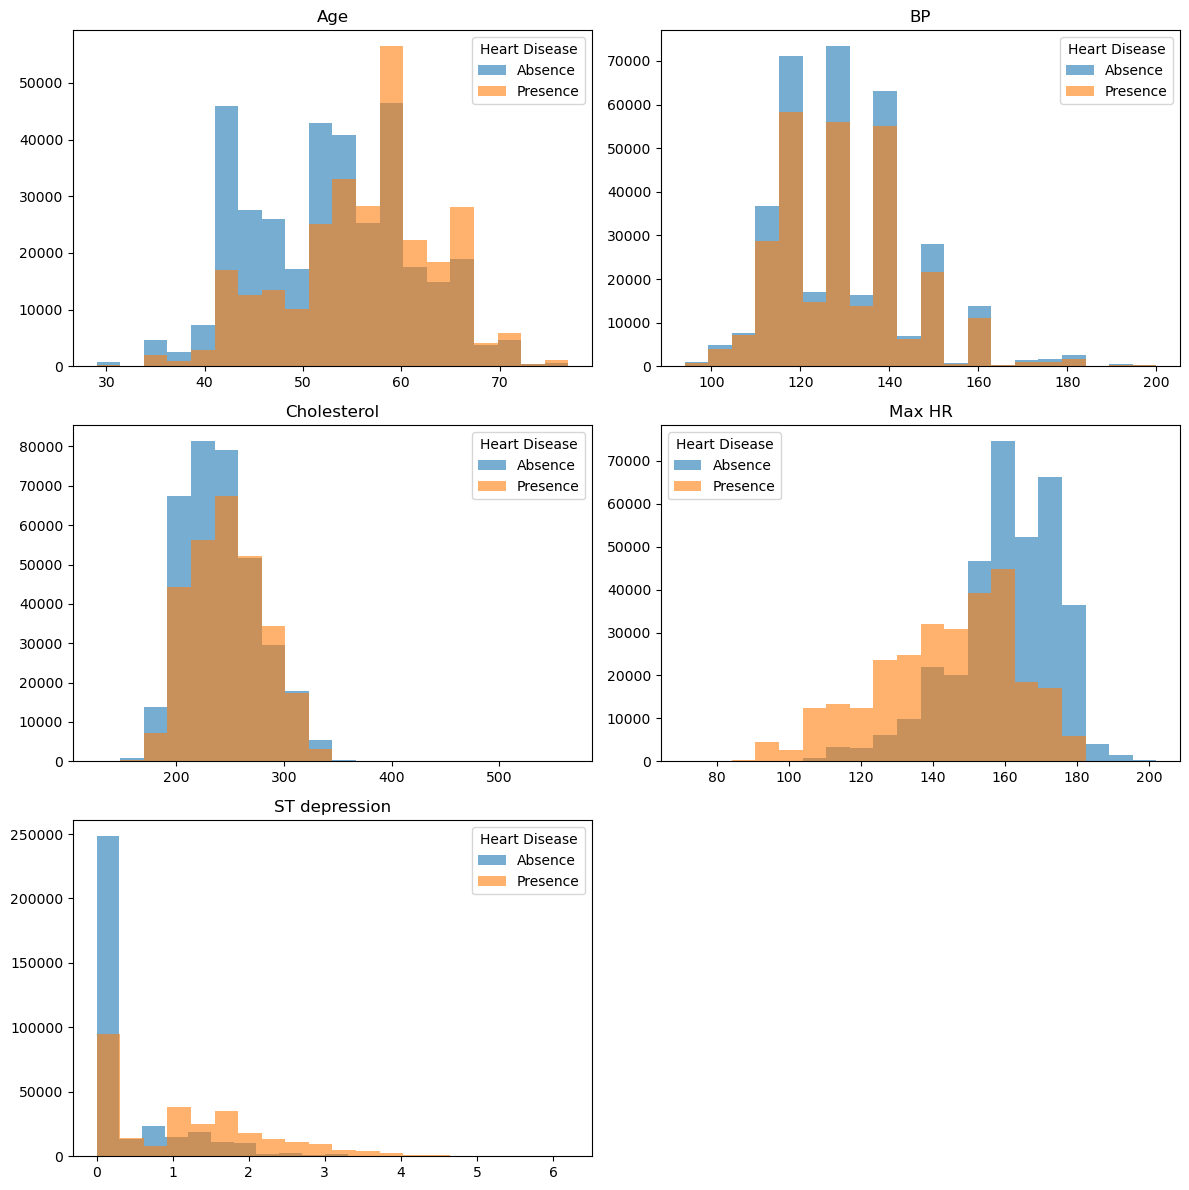

In [12]:
num_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
num_features = [f for f in num_features if f in train.columns]

cols = 2
rows = math.ceil(len(num_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for ax, feat in zip(axes, num_features):
    for tval in sorted(train[target].unique()):
        subset = train[train[target] == tval][feat].dropna()
        ax.hist(subset, alpha=0.6, label=str(tval), bins=20)

    ax.set_title(feat)
    ax.legend(title=target)

for i in range(len(num_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()